In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ExoMod as EM

## Modelling

[1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238, 1629354.8453444238,

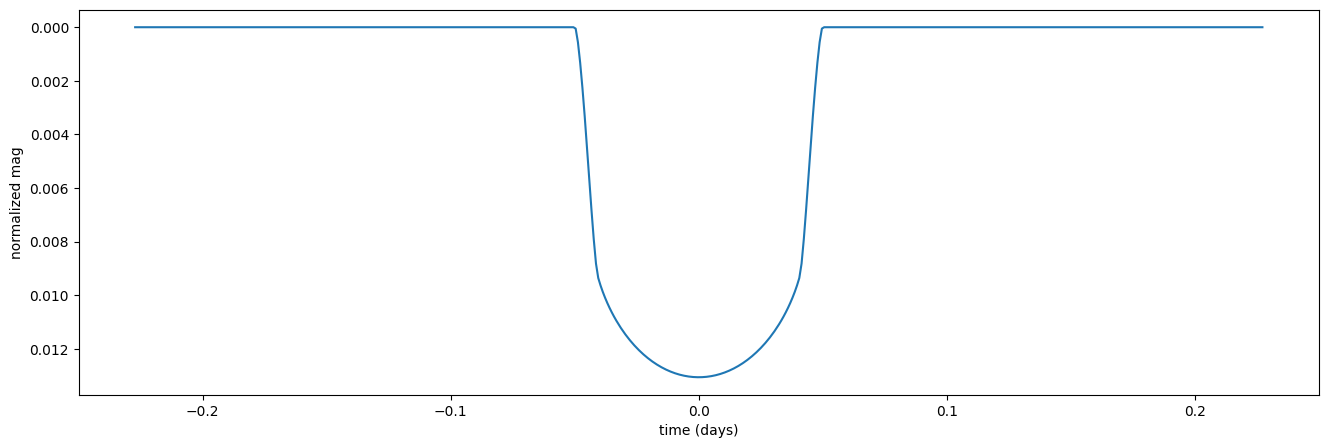

In [2]:
x1,y1 = EM.model_LD_field(0.1,0.2, 0.1, 0.5)
plt.figure(figsize=(16, 5))
plt.plot(x1,y1)
plt.xlabel('time (days)')
plt.ylabel('normalized mag')
plt.gca().invert_yaxis()
plt.show()

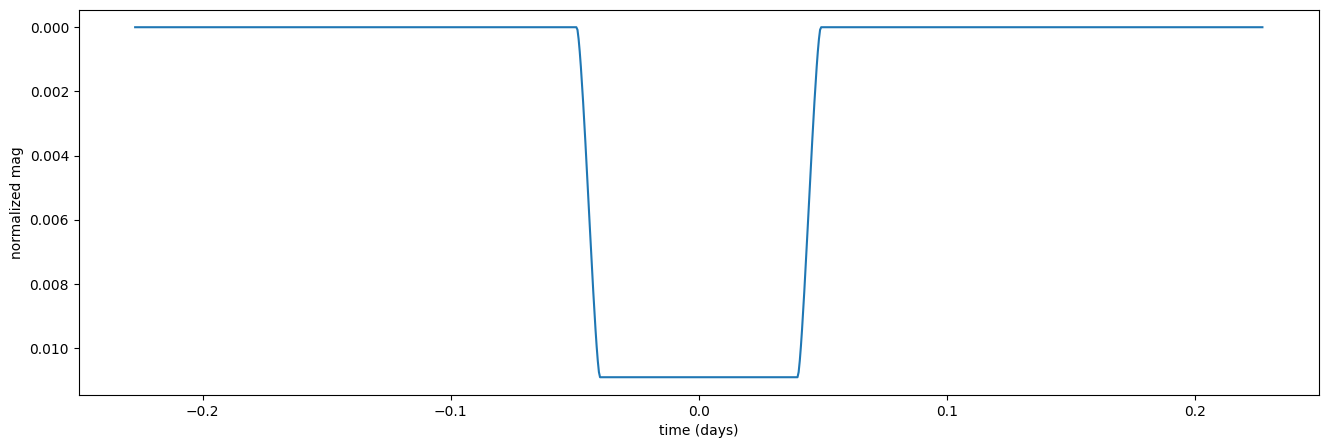

In [3]:
x3,y3 = EM.model(0.1,0.2, 0.1)
plt.figure(figsize=(16, 5))
plt.plot(x3,y3)
plt.xlabel('time (days)')
plt.ylabel('normalized mag')
plt.gca().invert_yaxis()
plt.show()

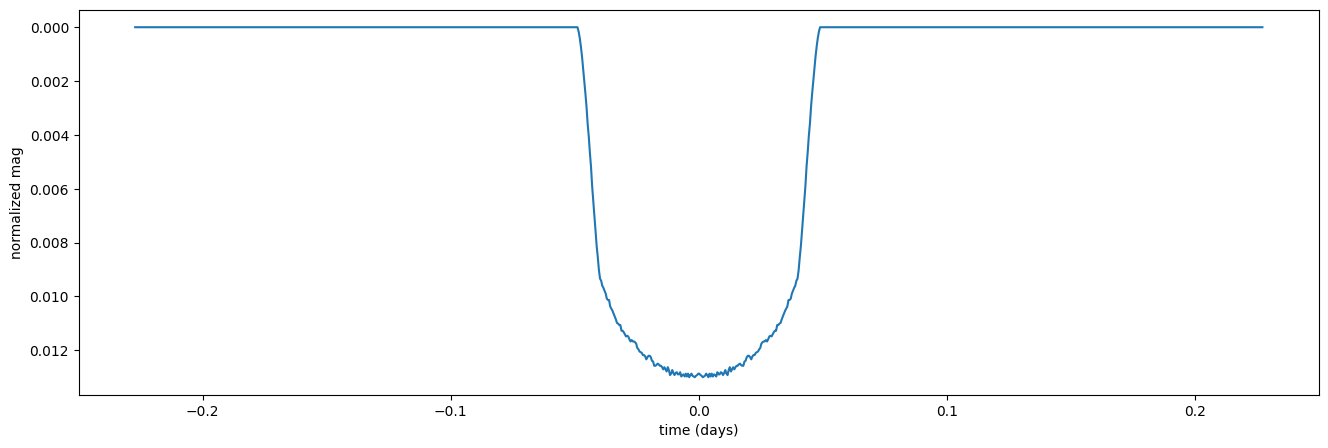

In [4]:
x1,y1 = EM.model_LD_points(0.1,0.2,0.1,0.5)
plt.figure(figsize=(16, 5))
plt.plot(x1,y1)
plt.xlabel('time (days)')
plt.ylabel('normalized mag')
plt.gca().invert_yaxis()
plt.show()

## Fitting

In [6]:
data=np.loadtxt(r"E:\project\Exoplanet Modelling\ETD Sample (R filter)\33.txt")
data_fix=[[],[],[]]
for i in range(126):
    data_fix[0].append(data[i][0])
    data_fix[1].append(data[i][1])
    data_fix[2].append(data[i][2])

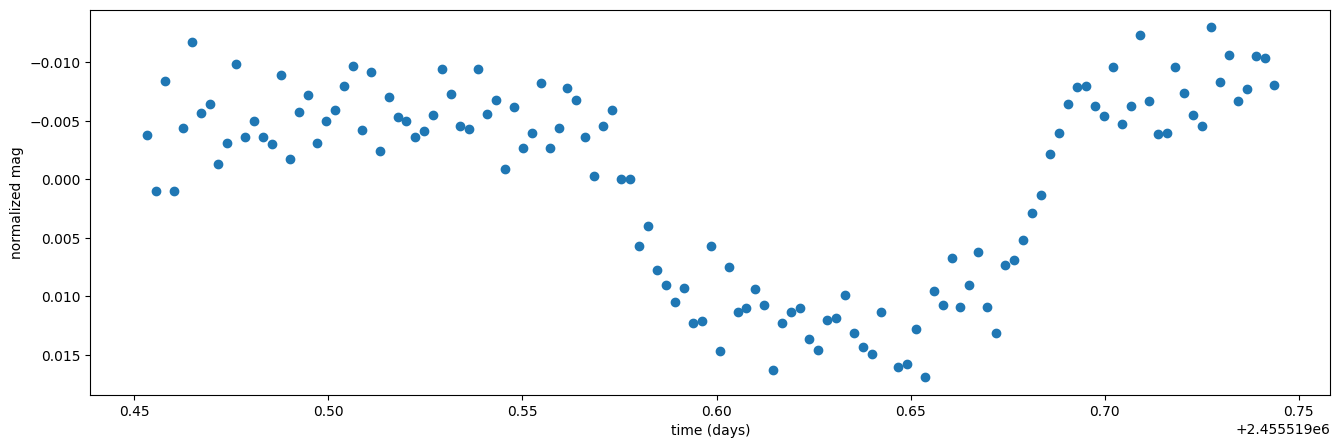

In [7]:
plt.figure(figsize=(16,5))
plt.scatter(data_fix[0],data_fix[1])
plt.xlabel('time (days)')
plt.ylabel('normalized mag')
plt.gca().invert_yaxis()
plt.show()

Best R_squared: 0.8938314543229713
Best parameters: [ 0.12726827  0.68213682  0.15748336  0.17708009 -0.00602079]


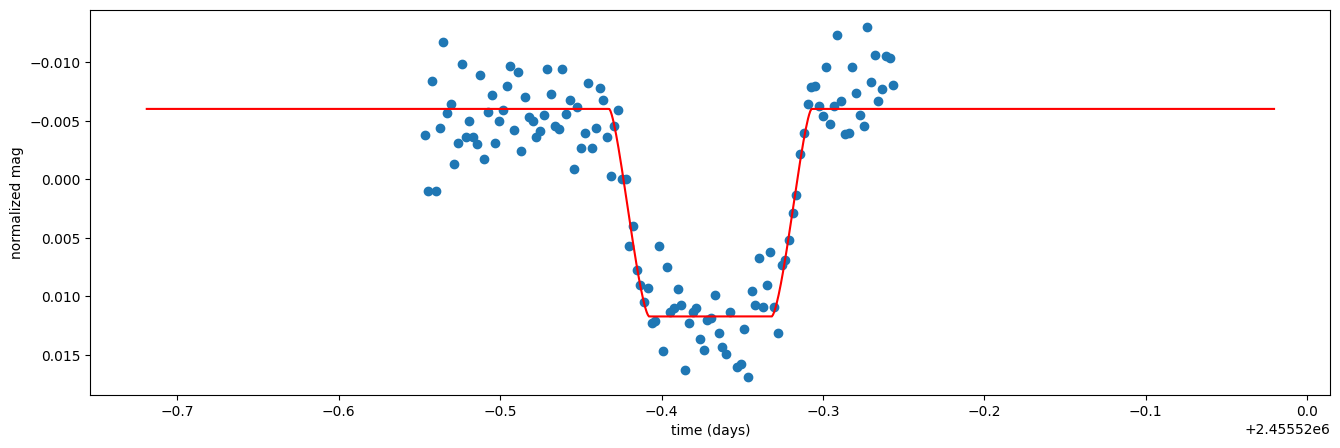

rasio=  0.12726827230928572
impact param=  0.6821368191845627
transit duration=  0.15748336362738366


In [9]:
x,y=EM.Fitting(data_fix[0],data_fix[1])

Best R_squared: -2877.4721139163767
Best parameters: [ 0.12693904  0.63066299  0.14790333  0.17726975 -0.00598413]
rasio=  0.1269390426224936
impact param=  0.630662986849957
transit duration=  0.1479033270401273


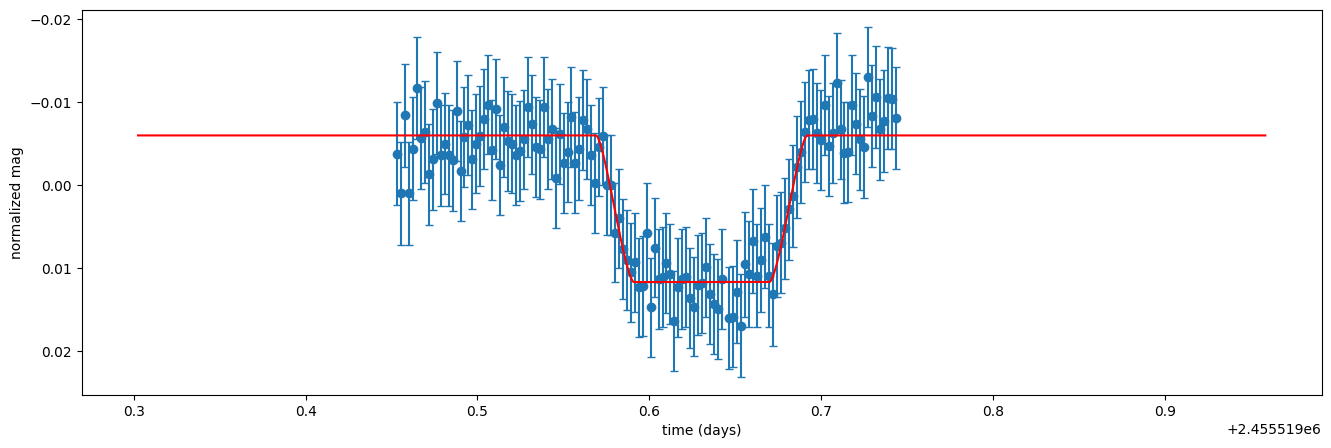

In [11]:
x,y=EM.FittingErr(data_fix[0],data_fix[1],data_fix[2])

## Stacking

### File reading 

33
40
41
107
245
284
290
295
298
300
308
313


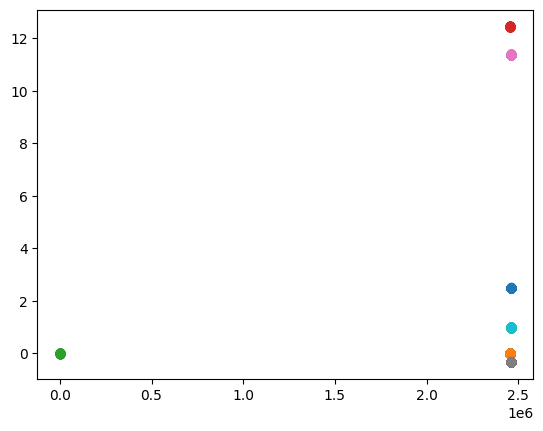

In [3]:
def read_nth_column(file_path, n):
    try:
        # Open the file in read mode
        with open(file_path, 'r') as file:
            # Read lines from the file
            lines = file.readlines()

            # Initialize an empty array to store the nth column values
            nth_column_values = []

            # Iterate through each line
            for line in lines:
                # Split the line into columns
                columns = line.split()

                # Check if the line has enough columns
                if len(columns) >= n:
                    # Extract the nth column and append it to the array
                    nth_column_values.append(columns[n - 1])

            return nth_column_values

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return []
def remove_spaces_and_convert(input_list):
    output_list = [eval(item.replace(' ', '')) for item in input_list]
    return output_list
def remove_spaces_and_convert2(input_list):
    output_list = [eval(''.join(char for char in item if char.isdigit() or char == '.')) for item in input_list]
    return output_list
fluxdata=[]
timedata=[]
namelist=[33,40,41,107,245,284,290,295,298,300,308,313]
for i in namelist:
    try:
        print(i)
        path=rf"E:\project\Exoplanet Modelling\ETD Sample (R filter)\{i}.txt"
        magdata = np.array(remove_spaces_and_convert(read_nth_column(path, 2)))
        JDdata = np.array(remove_spaces_and_convert(read_nth_column(path, 1)))
        timedata.append(JDdata)
        fluxdata.append(magdata)
        plt.scatter(JDdata,magdata)
    except:
        pass
for i in range(len(timedata)):
    if i==5 or i==8 or i==9:
        fluxdata[i]=-fluxdata[i]


### Stacking Feature

e:\project\Exoplanet Modelling\ExoMod.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  v=2*(R1+R2)/t_transit
e:\project\Exoplanet Modelling\ExoMod.py:36: RuntimeWarning: invalid value encountered in scalar multiply
  flux_points2.append(uncovered_area(a,b,R1,(a1+v*time_sample[i]),b1+(impact*R1),R2))


Best R_squared: 0.8916039065984696
Best parameters: [ 0.12881356  0.74048423  0.17154778  0.17726082 -0.00585228]
Best R_squared: 0.9054756479648586
Best parameters: [ 0.12183288  0.53431763  0.13709418  0.21607287 -0.0047006 ]
Best R_squared: 0.9191786962371782
Best parameters: [ 0.1265547   0.70125498  0.17317634  0.14225808 -0.0018251 ]
Best R_squared: 0.9587547040580983
Best parameters: [ 0.13038823  0.76467293  0.17899167  0.0902195  12.42758857]
Best R_squared: 0.929206923688409
Best parameters: [ 0.13896336  0.70052028  0.16813804  0.10656666 -0.33135395]
Best R_squared: 0.9795768395809198
Best parameters: [ 0.11779195  0.71944038  0.16856018  0.10610622 -1.00019073]
Best R_squared: 0.9297416276680468
Best parameters: [ 0.11967885  0.79578306  0.18562103  0.06264054 11.36126954]
Best R_squared: 0.8824274887318319
Best parameters: [ 0.12274075  0.45108403  0.13408067  0.15523633 -0.3294899 ]
Best R_squared: 0.988734450801527
Best parameters: [ 0.12246105  0.70946805  0.16826503  

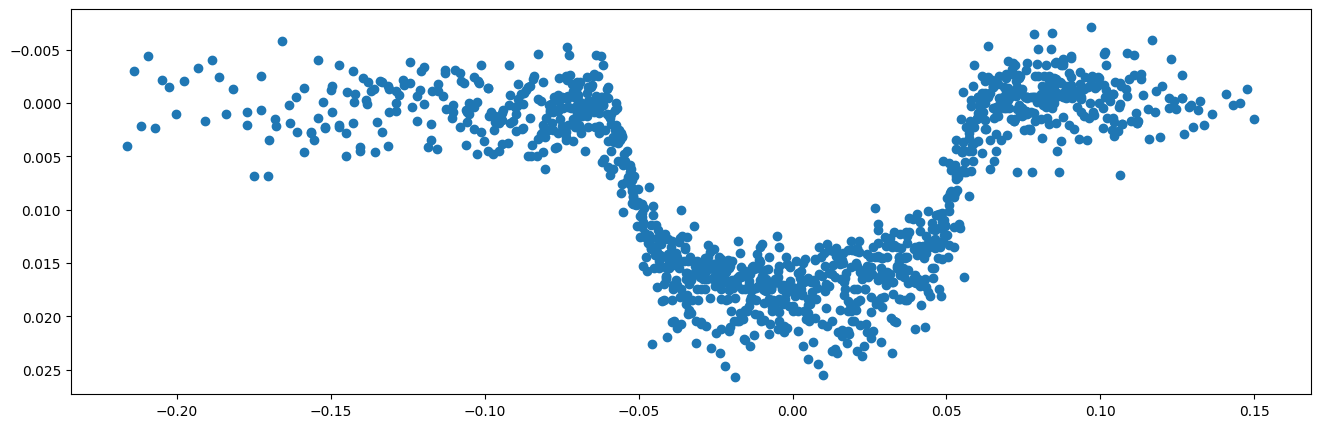

In [4]:
JD_all,mag_all=EM.Lightcurve_Stacking(timedata, fluxdata, visualize=True)